In [188]:
# Import the required modules
from IPython.display import clear_output
import PIL.Image
from io import BytesIO
import IPython.display

import cv2
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\os.kartashev\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [189]:
# UTILITY FUNCTIONS

In [190]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    if len(a.shape) is 3:
        a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [191]:
def get_frame_by_num(vid, num):
    vid.set(cv2.CAP_PROP_POS_FRAMES, num)
    ret, frame = vid.read()
    return frame

In [192]:
# PROCESS FUNCTIONS

In [193]:
input_file_path = 'bandicam 2018-10-24 10-51-31-769.mp4'
vid = cv2.VideoCapture(input_file_path)
print(vid.get(cv2.CAP_PROP_FPS))

29.087123910937997


-204
(856, 1552, 3)


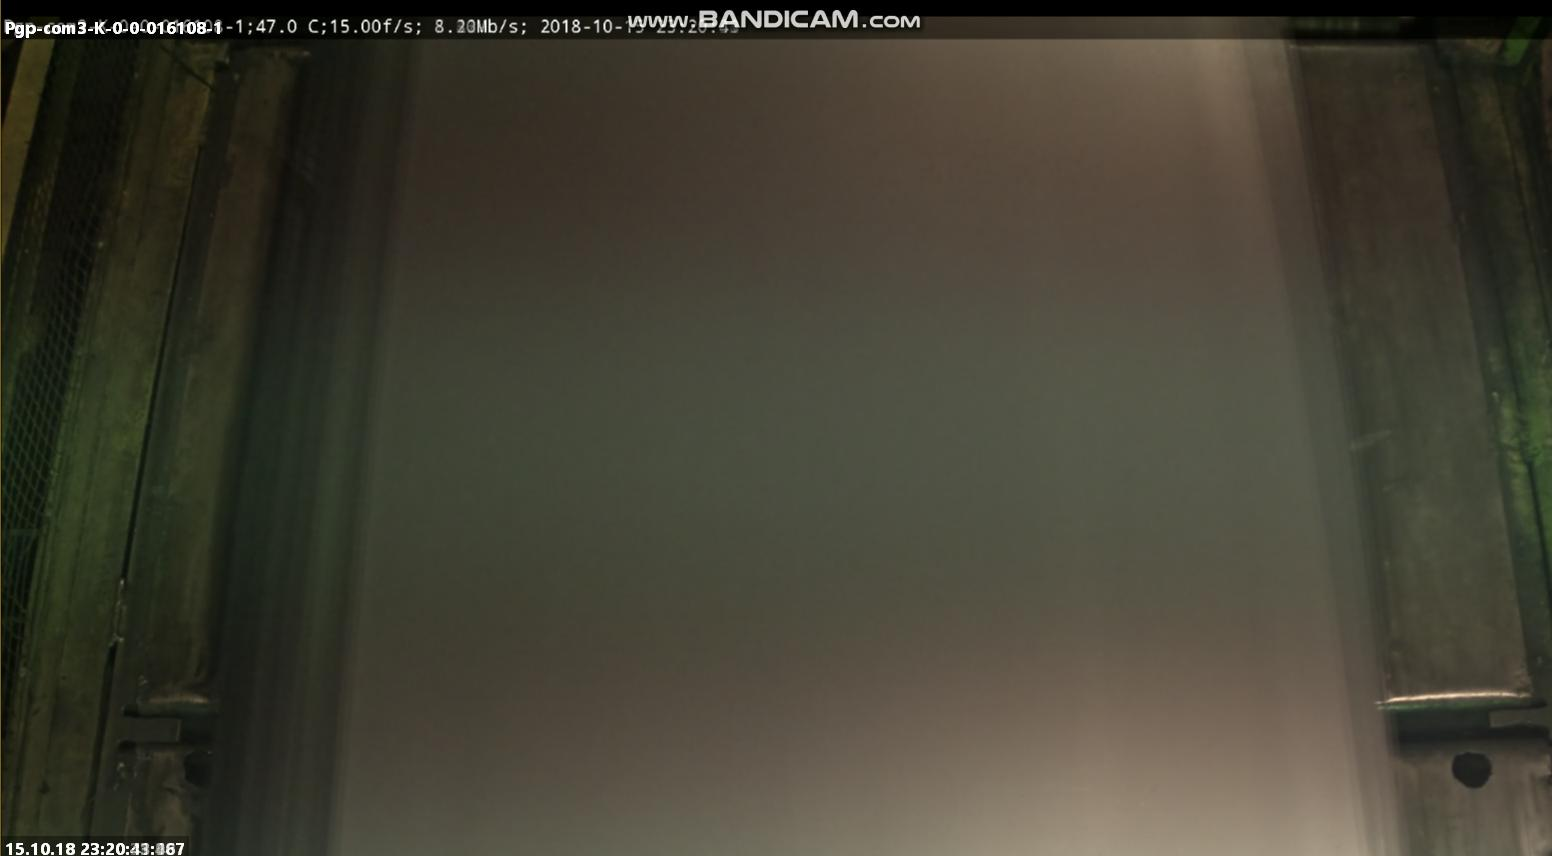

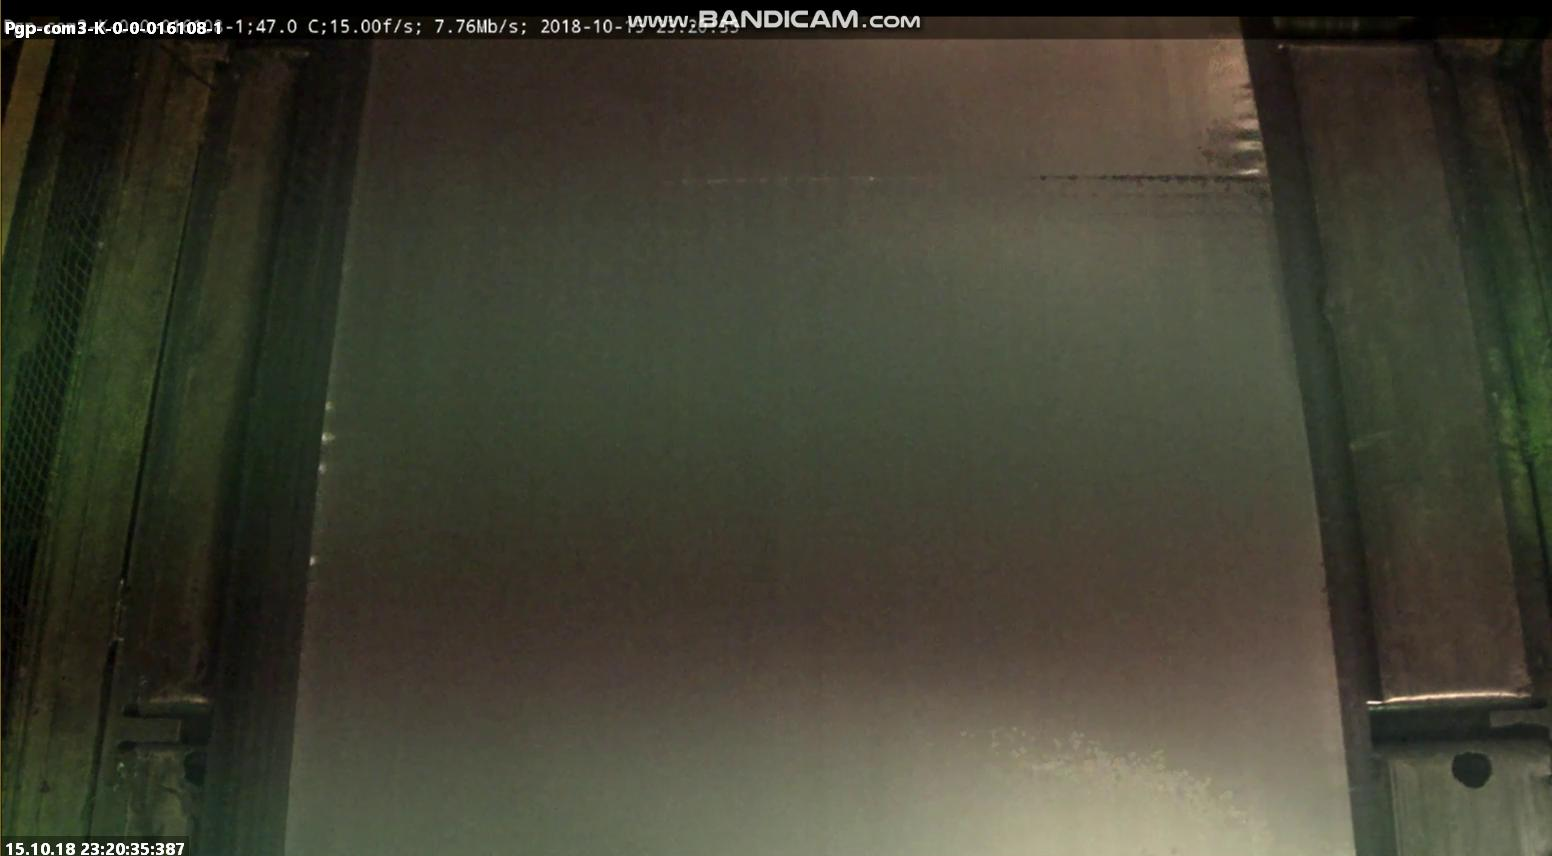

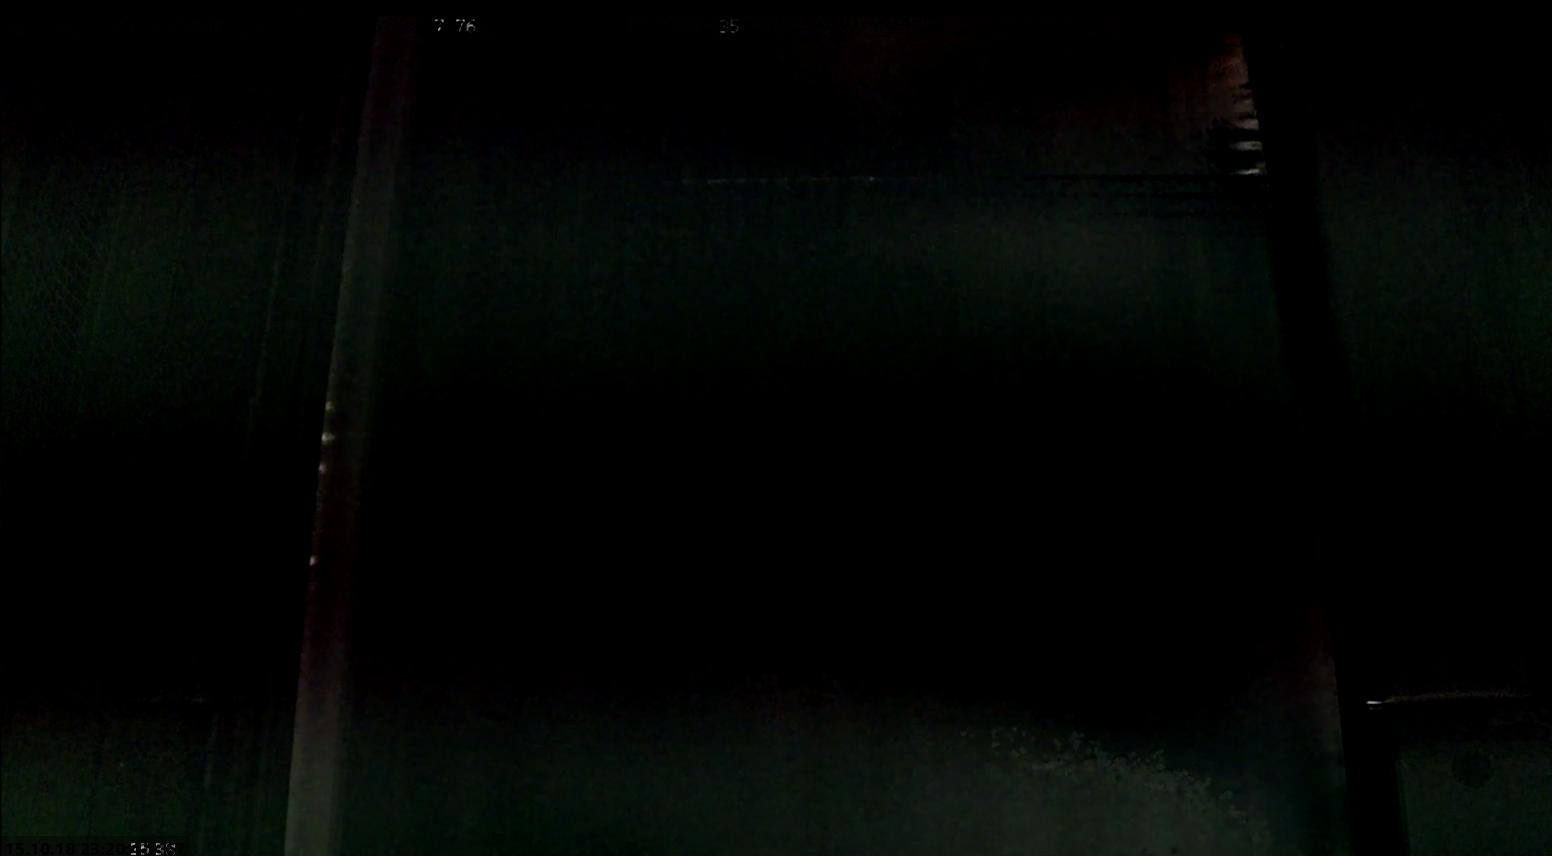

In [194]:
good_frames = numpy.array([443, 450, 451, 639, 704, 710, 716, 757, 766, 816, 819]).astype(int32)
good_29fps = np.zeros_like(good_frames)
multiplier = np.empty((1,good_frames.shape[0]))
multiplier.fill(vid.get(cv2.CAP_PROP_FPS)/30)
good_29fps = good_frames * multiplier
good_frames = good_29fps.astype(int32)
good_frames = good_frames[0]
sample = get_frame_by_num(vid, good_frames[0])
frame_sum = np.zeros_like(sample).astype(int64)
for i, frame_num in enumerate(good_frames):
    frame = np.copy(get_frame_by_num(vid, frame_num))
    np.add(frame_sum, frame, frame_sum)
frame_avg = frame_sum / (i + 1)
frame_avg = frame_avg.astype(int16)
frame_bad = get_frame_by_num(vid, 494).astype(int16) #486
frame_diff = np.subtract(frame_bad, frame_avg)
print(np.min(frame_diff))
frame_diff[frame_diff < 0] = 0
frame_diff = frame_diff.astype(uint8)
frame_avg = frame_avg.astype(uint8)
frame_bad = frame_bad.astype(uint8)
print(np.shape(frame_diff))

showarray(frame_avg)
showarray(frame_bad)
showarray(frame_diff)
